<a href="https://colab.research.google.com/github/ErinTruong-png/Pandas-Data-Analysis-/blob/main/Zurich_dog_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read Me**

This project will analyse data about different dog breeds and their owners in Zurich, Switzerland in 2015.

Guiding Questions:
1. What is the distribution of female dog owners and male dog owners?
2. What is the most popular dog breed in Zurich during 2015?

The dataset is in German so I will also perform dataframe maniuplation so the data will make sense for an English speaking audience.

The dataset is from Kaggle: https://www.kaggle.com/datasets/kmader/dogs-of-zurich

In [57]:
#Import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Data analysis/Projects/Data files/Fun/2015_Zurich_dog.csv')
df

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6975,128471,21-30,w,8.0,83.0,Tibetan Spaniel,NaN,NaN,NaN,K,2007,w,braun/beige
6976,128471,21-30,w,8.0,83.0,Rottweiler,NaN,NaN,NaN,I,2014,m,schwarz/rot
6977,128479,51-60,w,6.0,63.0,Lagotto Romagnolo,Mischling,NaN,NaN,I,2007,m,weiss/grau
6978,128482,21-30,w,9.0,91.0,Yorkshire Terrier,NaN,NaN,NaN,K,2015,w,schwarz/braun/grau


In [58]:
#Translate the column names before inspecting the data
df.rename(columns={'ALTER':'Owner_age','GESCHLECHT':'Owner_gender','STADTKREIS': 'District',
                   'RASSE1':'Dog_breed','GEBURTSJAHR_HUND':'Dog_birth_year','GESCHLECHT_HUND':'Dog_gender'},inplace=True)
df

,HALTER_ID,Owner_age,Owner_gender,District,STADTQUARTIER,Dog_breed,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,Dog_birth_year,Dog_gender,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6975,128471,21-30,w,8.0,83.0,Tibetan Spaniel,NaN,NaN,NaN,K,2007,w,braun/beige
6976,128471,21-30,w,8.0,83.0,Rottweiler,NaN,NaN,NaN,I,2014,m,schwarz/rot
6977,128479,51-60,w,6.0,63.0,Lagotto Romagnolo,Mischling,NaN,NaN,I,2007,m,weiss/grau
6978,128482,21-30,w,9.0,91.0,Yorkshire Terrier,NaN,NaN,NaN,K,2015,w,schwarz/braun/grau


In [59]:
#Remove unwanted columns
df = df.drop(columns=['HALTER_ID','STADTQUARTIER','RASSE1_MISCHLING','RASSE2','RASSE2_MISCHLING','RASSENTYP','HUNDEFARBE'])
df

,Owner_age,Owner_gender,District,Dog_breed,Dog_birth_year,Dog_gender
0,51-60,m,9.0,Welsh Terrier,2011,w
1,61-70,w,2.0,Cairn Terrier,2002,w
2,41-50,m,6.0,Labrador Retriever,2012,w
3,61-70,w,7.0,Mittelschnauzer,2010,w
4,51-60,m,10.0,Shih Tzu,2011,m
...,...,...,...,...,...,...
6975,21-30,w,8.0,Tibetan Spaniel,2007,w
6976,21-30,w,8.0,Rottweiler,2014,m
6977,51-60,w,6.0,Lagotto Romagnolo,2007,m
6978,21-30,w,9.0,Yorkshire Terrier,2015,w


In [60]:
#Inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6980 entries, 0 to 6979
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Owner_age       6978 non-null   object 
 1   Owner_gender    6980 non-null   object 
 2   District        6978 non-null   float64
 3   Dog_breed       6980 non-null   object 
 4   Dog_birth_year  6980 non-null   int64  
 5   Dog_gender      6980 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 327.3+ KB


In [61]:
df.describe()

,District,Dog_birth_year
count,6978.000000,6980.000000
mean,7.421038,2008.214613
std,3.257542,49.606245
min,1.000000,1.000000
25%,4.000000,2005.000000
50%,8.000000,2009.000000
75%,10.000000,2012.000000
max,12.000000,5012.000000


In [63]:
#Change owner gender and dog gender from m to M and w to F for easier reading
df['Owner_gender'] = df['Owner_gender'].str.replace('m', 'M')
df['Owner_gender'] = df['Owner_gender'].str.replace('w', 'F')

df['Dog_gender'] = df['Dog_gender'].str.replace('m','M')
df['Dog_gender'] = df['Dog_gender'].str.replace('w','F')

df

,Owner_age,Owner_gender,District,Dog_breed,Dog_birth_year,Dog_gender
0,51-60,M,9.0,Welsh Terrier,2011,F
1,61-70,F,2.0,Cairn Terrier,2002,F
2,41-50,M,6.0,Labrador Retriever,2012,F
3,61-70,F,7.0,Mittelschnauzer,2010,F
4,51-60,M,10.0,Shih Tzu,2011,M
...,...,...,...,...,...,...
6975,21-30,F,8.0,Tibetan Spaniel,2007,F
6976,21-30,F,8.0,Rottweiler,2014,M
6977,51-60,F,6.0,Lagotto Romagnolo,2007,M
6978,21-30,F,9.0,Yorkshire Terrier,2015,F


In [64]:
#What is the age of dog owners in Zurich during 2015
owners_by_age =  df['Owner_age'].value_counts().sort_index()
owners_by_age

Owner_age
11-20       41
21-30      786
31-40     1266
41-50     1491
51-60     1512
61-70     1043
71-80      644
81-90      179
91-100      16
Name: count, dtype: int64

In [65]:
owners_by_gender =  df['Owner_gender'].value_counts()
print(owners_by_gender)

# Group owners by age
female_owners_ages = np.array(df[df['Owner_gender'] == 'F']['Owner_age'].value_counts().sort_index())
male_owners_ages = np.array(df[df['Owner_gender'] == 'M']['Owner_age'].value_counts().sort_index())

print(female_owners_ages)

Owner_gender
F    4782
M    2198
Name: count, dtype: int64
[  31  605  864  989 1039  697  426  119   12]


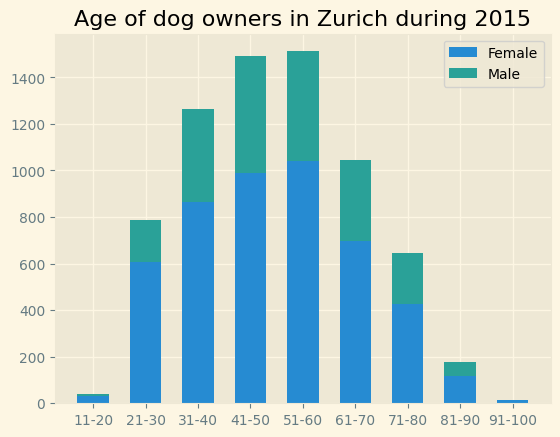

In [73]:
#What is the age and gender distribution of female and male dog owners in Zurich?
fig, ax = plt.subplots()
bottom = np.zeros(len(owners_by_age.index))

age_by_gender = {
  'Women': female_owners_ages,
  'Men': male_owners_ages
}

# Add woman
women = ax.bar(owners_by_age.index, female_owners_ages, 0.6, label='Female', bottom=bottom)
bottom += female_owners_ages

male = ax.bar(owners_by_age.index, male_owners_ages, 0.6, label='Male', bottom=bottom)
bottom += male_owners_ages

ax.set_title('Age of dog owners in Zurich during 2015')
ax.legend()

plt.show()

Text(0, 0.5, 'Count')

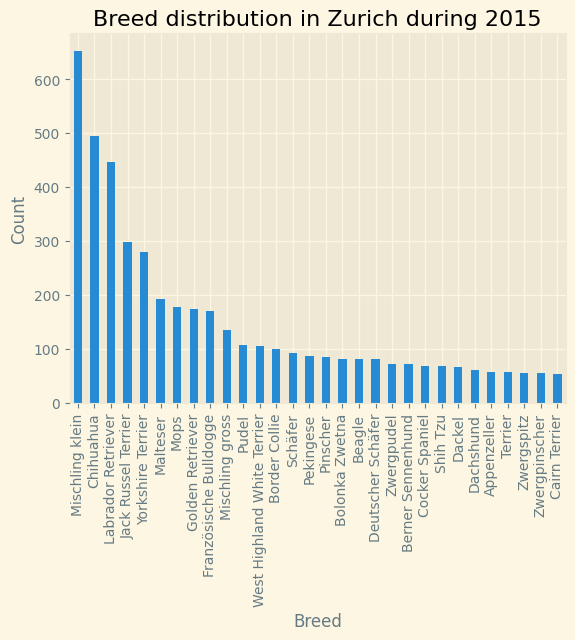

In [72]:
#What is the most popular dog breed in Zurich?
ax = df['Dog_breed'].value_counts() \
    .head(30) \
    .plot(kind='bar', title='Breed distribution in Zurich during 2015')
ax.set_xlabel('Breed')
ax.set_ylabel('Count')

#Mischling Klein (mixed breed small dogs) is the most popular in Zurich